# Question

Company A is interested in building geofences around its retail locations and using 3rd party mobile data to dress a better profile of their consumers, helping plan future marketing campaigns.
Before manually mapping geofences of thousands of retail locations, the leadership team turns towards you, the data scientist, to create/find at least 1000 geofences in QC to test the 3rd party data.
<ol>
    <li> Provide a list of at least 1000 retail locations and their geofences in QC </li>
    <li> Display them on a map </li>
    <li>  Discuss pros/cons of your approach </li>
    <li>  Plot the distribution of their sales </li>
    <li> Discuss the distribution of their sales (normality, outliers, variance, standard deviation, etc.) </li>
</ol>
To achieve this, you can use the technologies and tools of your choice.

What are geofences:
<a href = "https://en.wikipedia.org/wiki/Geofence#:~:text=A%20geofence%20is%20a%20virtual,school%20zones%20or%20neighborhood%20boundaries">Geofence Wikipedia</a> <br>
Other resources:
<href> https://www.statcan.gc.ca/eng/lode/databases/odb </href>

<h1><center>Solution</center></h1>

In [14]:
#importation of libraries
import pandas as pd
import geopandas as gpd
import geopy as gpy
from geopy.extra import rate_limiter 
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

In [4]:
retail_df = pd.read_csv("retail_locations.csv")
retail_df.head()

,erp_id,province_code,lat,long,sales
0,4,QC,45.537593,-73.597075,0.089069
1,19,QC,45.488636,-73.568175,0.074907
2,22,QC,48.387871,-68.470686,0.611644
3,24,QC,46.795660,-71.356166,-0.778827
4,37,QC,45.510311,-73.570841,0.586588


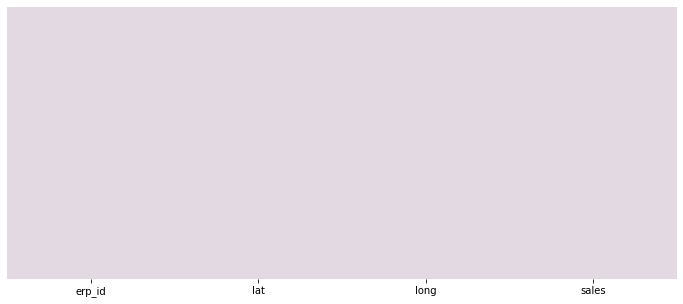

In [8]:
#Checking for missing values
plt.figure(figsize=(12, 5))
sns.heatmap(retail_df.corr().isnull(), cmap ="twilight_r", yticklabels=False, cbar = False, )

No missing values

In [181]:
#concatenating the lat and long to have a cordinate point
retail_df["geom"] = retail_df["lat"].map(str) + "," + retail_df["long"].map(str)
retail_df["geom"].head(3)

0      45.537593,-73.597075
1      45.488636,-73.568175
2    48.3878711,-68.4706861
Name: geom, dtype: object

In [144]:
# part 1
geolocator = gpy.geocoders.Nominatim(user_agent="ajayiebenezer70@gmail.com", timeout=10)
location = rate_limiter.RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [171]:
def location_point(cordinate):
    address = ",".join(geolocator.reverse(cordinate)[0].split(",")[:6]).strip()
    postal_code =  (geolocator.reverse(cordinate))[0].split(", ")[-2].strip()
    return address, postal_code

In [172]:
retail_df["full_address"] = retail_df["geom"].apply(location_point)
retail_df["address"] = retail_df["full_address"].apply(lambda addr:addr[0])
retail_df["postal_code"] = retail_df["full_address"].apply(lambda addr:addr[1])

In [188]:
retail_df.drop("full_address", axis=1, inplace=True)
retail_df.head(3)

,erp_id,province_code,lat,long,sales,geom,address,postal_code
0,4,QC,45.537593,-73.597075,0.089069,"45.537593,-73.597075","6062, Rue De Normanville, Père-Marquette, Rose...",H2S 3L9
1,19,QC,45.488636,-73.568175,0.074907,"45.488636,-73.568175","1738, Rue Notre-Dame Ouest, Petite-Bourgogne, ...",H3J 1M3
2,22,QC,48.387871,-68.470686,0.611644,"48.3878711,-68.4706861","14, , Rimouski, Rimouski-Neigette, Bas-Saint-L...",G5N 5P1


In [189]:
# part 2

In [191]:
gdf = gpd.GeoDataFrame(retail_df, geometry=gpd.points_from_xy(retail_df.long, retail_df.lat))
gdf.head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry
0,4,QC,45.537593,-73.597075,0.089069,"45.537593,-73.597075","6062, Rue De Normanville, Père-Marquette, Rose...",H2S 3L9,POINT (-73.59708 45.53759)
1,19,QC,45.488636,-73.568175,0.074907,"45.488636,-73.568175","1738, Rue Notre-Dame Ouest, Petite-Bourgogne, ...",H3J 1M3,POINT (-73.56817 45.48864)
2,22,QC,48.387871,-68.470686,0.611644,"48.3878711,-68.4706861","14, , Rimouski, Rimouski-Neigette, Bas-Saint-L...",G5N 5P1,POINT (-68.47069 48.38787)
3,24,QC,46.795660,-71.356166,-0.778827,"46.7956598,-71.3561663","1438, Rue Notre-Dame, L'Ancienne-Lorette, Québ...",G2E 1Z7,POINT (-71.35617 46.79566)
4,37,QC,45.510311,-73.570841,0.586588,"45.510310700000005,-73.570841","169, Place Sainte-Famille, Milton Parc, Platea...",H2X 1X7,POINT (-73.57084 45.51031)


In [193]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(gdf, lat="lat", lon="long",size_max=6, zoom=8, width=1000, height=600)

There are clusters of locations in Montreal, Quebec city, Longueuil, Repentigny, Shawinigan, and Sherbrooke in that order.

Text(2, 0.4, 'mean')

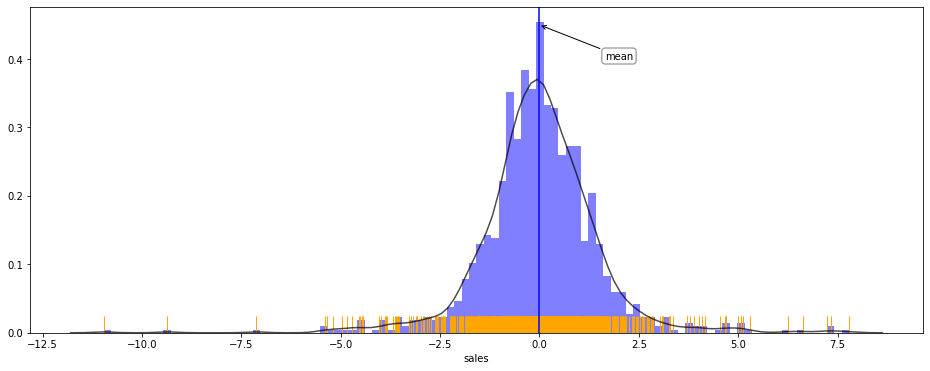

In [283]:
#part 4 & 5
plt.figure(figsize=(16, 6))
sns.distplot(retail_df["sales"], bins = 100, hist_kws={"histtype": "bar", "linewidth":  0.8 ,"alpha": 0.5, "color": "blue"},
                 kde_kws={"color":"black", "alpha" : 0.7}, 
                 rug=True, rug_kws={"color":"orange"})
plt.axvline(x=retail_df.sales.mean(), color = "blue") #mean line
plt.annotate('mean', xy=(retail_df.sales.mean(), 0.45), xytext=(2, 0.4), ha='center', xycoords='data',
            arrowprops=dict(arrowstyle="->"), bbox=dict(boxstyle="round", fc="none", ec="gray"))

The distribution of sales looks like a Gaussian distribution which implies that it is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. Hence, the mean (the blue line) is approximately equal to the median (mean = <b>-0.006920</b>} and median = <b>-0.017408</b>) <br>

However, we may want to inteprete the curve to be slightly negatively skewed in the sense that imore values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer (<b>583</b> are to the right and <b>569</b> are to the left). We could see 

Considering the Central Limit Theorem, the more independent random variables we have, the more the curve normalizes to being perfectly normally distributed. 

In [236]:
# The result above explained(1st paragraph)
retail_df[["sales"]].describe(include="all")

,sales
count,1152.000000
mean,-0.006920
std,1.487999
min,-10.957124
25%,-0.715086
50%,-0.017408
75%,0.738120
max,7.788058


In [251]:
# The result above explained(2nd paragraph)
print(f"{sum(retail_df['sales'] < (retail_df.sales.mean()))} sales are below the mean sales point")
print(f"{sum(retail_df['sales'] > (retail_df.sales.mean()))} sales are above the mean sales point ")

581 sales are below the mean sales point
571 sales are above the mean sales point 


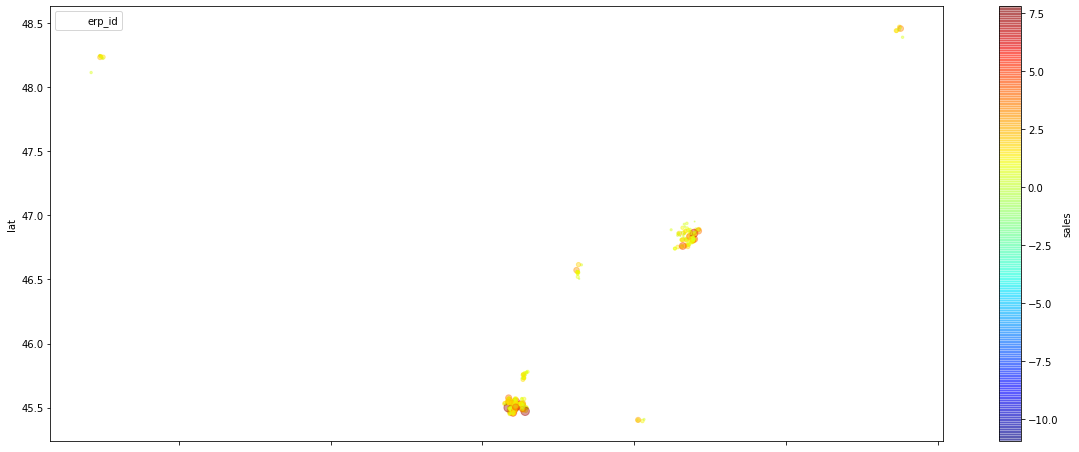

In [206]:
retail_df.plot(kind = "scatter", x = "long", y = "lat", figsize = (20, 8), alpha=0.4, 
               s=retail_df["sales"]*10, label="erp_id", c="sales", cmap=plt.get_cmap("jet"), colorbar=True)

In [214]:
retail_df[["sales"]].describe(include="all")

,sales
count,1152.000000
mean,-0.006920
std,1.487999
min,-10.957124
25%,-0.715086
50%,-0.017408
75%,0.738120
max,7.788058


In [222]:
sum(retail_df["sales"] < 0)

583

In [254]:
retail_df.sales.var()

2.2141412226368273

Variance measures how spread out the data is from the average sales. A variance of zero indicates that all of the data values are identical. All non-zero variances are positive.
A small variance indicates that the data points tend to be very close to the mean, and to each other. A high variance indicates that the data points are very spread out from the mean, and from one another. Variance is the average of the squared distances from each point to the mean

In [255]:
retail_df.sales.std()

1.487999066745953

Standard deviation (represented by the symbol sigma, σ) shows how much variation or dispersion exists from the average (mean), or expected value. More precisely, it is a measure of the average distance between the values of the data in the set and the mean. A low standard deviation indicates that the data points tend to be very close to the mean; a high standard deviation indicates that the data points are spread out over a large range of values. A useful property of standard deviation is that, unlike variance, it is expressed in the same units as the data.
Standard error increases when standard deviation, i.e. the variance of the population, increases. Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean.

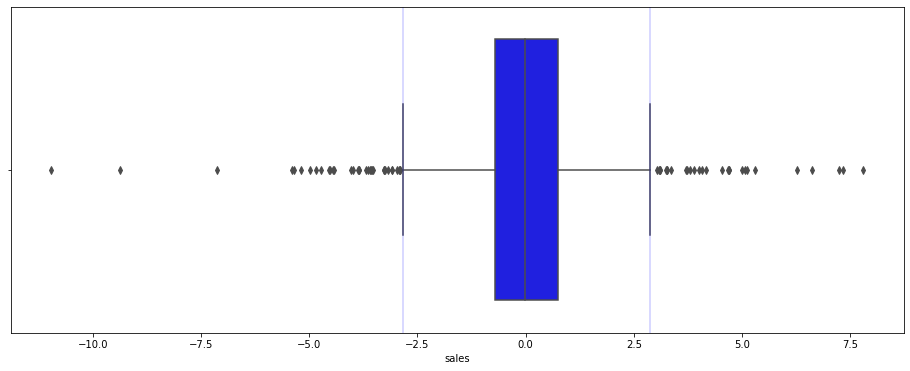

In [313]:
plt.figure(figsize=(16, 6))
sns.boxplot(x= retail_df.sales, color = "blue")
plt.axvline(-2.83, color = "blue", alpha = 0.2) 
plt.axvline(2.87, color = "blue", alpha = 0.2)

When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot

In [324]:
retail_df[retail_df["sales"] < -2.83].head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry
6,54,QC,46.835607,-71.218640,-3.877404,"46.835607,-71.21863990000001","1788, Rue de la Trinité, Maizerets, La Cité-Li...",G1J 2M4,POINT (-71.21864 46.83561)
8,69,QC,45.518215,-73.578109,-3.181758,"45.518215399999995,-73.5781092","130, Avenue Duluth Est, Saint-Louis, Plateau M...",H2W 2E5,POINT (-73.57811 45.51822)
25,159,QC,45.459887,-73.624582,-3.084699,"45.459886700000006,-73.6245821","Provigo, 6600, Rue Saint-Jacques, Upper Lachin...",H4B 1V8,POINT (-73.62458 45.45989)
36,244,QC,45.486071,-73.464938,-4.541264,"45.4860706,-73.4649375","IGA, Rue Mance, Greenfield Park, Longueuil, Lo...",J4P 3G2,POINT (-73.46494 45.48607)
40,252,QC,45.505026,-73.571004,-5.340211,"45.5050263,-73.5710036","La Tour Union, 2010, Rue Aylmer, Quartier des ...",H3A 2S9,POINT (-73.57100 45.50503)


In [323]:
retail_df[retail_df["sales"] > 2.87].head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry
32,220,QC,45.576084,-73.655587,3.788434,"45.576084200000004,-73.65558670000001","2289, Boulevard Henri-Bourassa Est, Sault-aux-...",H2B2W3,POINT (-73.65559 45.57608)
47,291,QC,45.519847,-73.505356,6.620008,"45.5198475,-73.505356","952, Rue Sainte-Hélène, Vieux-Longueuil, Longu...",J4K 1E1,POINT (-73.50536 45.51985)
141,885,QC,46.571894,-72.762063,3.076797,"46.5718942,-72.7620632","2327, Avenue de la Montagne, Shawinigan, Mauri...",G9N 6Y7,POINT (-72.76206 46.57189)
159,1030,QC,45.494002,-73.582028,5.073654,"45.494002,-73.58202759999999","La Ciitadelle, Rue Saint-Marc, Montagne, Ville...",H3H 1N4,POINT (-73.58203 45.49400)
164,1052,QC,45.526953,-73.558583,4.679143,"45.5269531,-73.5585829","1905, Rue Ontario Est, Sainte-Marie, Ville-Mar...",H2L 1S7,POINT (-73.55858 45.52695)
